In [2]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [3]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [4]:
hun_etfs = ['LQD']
data = get_iex_data(hun_etfs)
data

[              open    high     low   close   volume ticker
 date                                                      
 2015-01-15  121.53  122.27  121.45  122.08  2171301    LQD
 2015-01-16  121.71  121.91  121.23  121.40  1322527    LQD
 2015-01-20  121.71  122.06  121.63  121.68  1648855    LQD
 2015-01-21  122.08  122.11  121.32  121.63  1878023    LQD
 2015-01-22  121.88  121.96  121.25  121.57  1938417    LQD
 ...            ...     ...     ...     ...      ...    ...
 2019-12-24  127.56  127.96  127.50  127.85  2638011    LQD
 2019-12-26  128.04  128.10  127.80  128.08  3879905    LQD
 2019-12-27  128.35  128.40  128.26  128.26  8752092    LQD
 2019-12-30  127.90  128.50  127.78  128.49  9993813    LQD
 2019-12-31  128.01  128.25  127.89  127.96  5499447    LQD
 
 [1249 rows x 6 columns]]

In [5]:
splv = data[0]
splv.to_csv('lqd.csv', encoding='utf-8')

In [6]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [7]:
data = clean_data(data)

In [8]:
data

[              open    high     low   close   volume ticker
 date                                                      
 2015-01-15  121.53  122.27  121.45  122.08  2171301    LQD
 2015-01-16  121.71  121.91  121.23  121.40  1322527    LQD
 2015-01-20  121.71  122.06  121.63  121.68  1648855    LQD
 2015-01-21  122.08  122.11  121.32  121.63  1878023    LQD
 2015-01-22  121.88  121.96  121.25  121.57  1938417    LQD
 ...            ...     ...     ...     ...      ...    ...
 2019-12-24  127.56  127.96  127.50  127.85  2638011    LQD
 2019-12-26  128.04  128.10  127.80  128.08  3879905    LQD
 2019-12-27  128.35  128.40  128.26  128.26  8752092    LQD
 2019-12-30  127.90  128.50  127.78  128.49  9993813    LQD
 2019-12-31  128.01  128.25  127.89  127.96  5499447    LQD
 
 [1249 rows x 6 columns]]

In [9]:
ts = data[0]['close']

## ARIMA analysis

In [10]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [11]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [10]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7173      0.085      8.427      0.000       0.550       0.884
ar.L2          0.0469      0.027      1.766      0.077      -0.005       0.099
ma.L1         -1.7610      0.086    -20.562      0.000      -1.929      -1.593
ma.L2          0.7621      0.085      8.943      0.000       0.595       0.929
ma.S.L5       -0.0307      0.027     -1.119      0.263      -0.084       0.023
ma.S.L10       0.0211      0.029      0.715      0.475      -0.037       0.079
sigma2         0.1394      0.005     29.379      0.000       0.130       0.149


In [11]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('lqd_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,0.7173,0.085,8.427,0.000,0.550,0.884
2,ar.L2,0.0469,0.027,1.766,0.077,-0.005,0.099
3,ma.L1,-1.7610,0.086,-20.562,0.000,-1.929,-1.593
4,ma.L2,0.7621,0.085,8.943,0.000,0.595,0.929
5,ma.S.L5,-0.0307,0.027,-1.119,0.263,-0.084,0.023
6,ma.S.L10,0.0211,0.029,0.715,0.475,-0.037,0.079
7,sigma2,0.1394,0.005,29.379,0.000,0.130,0.149


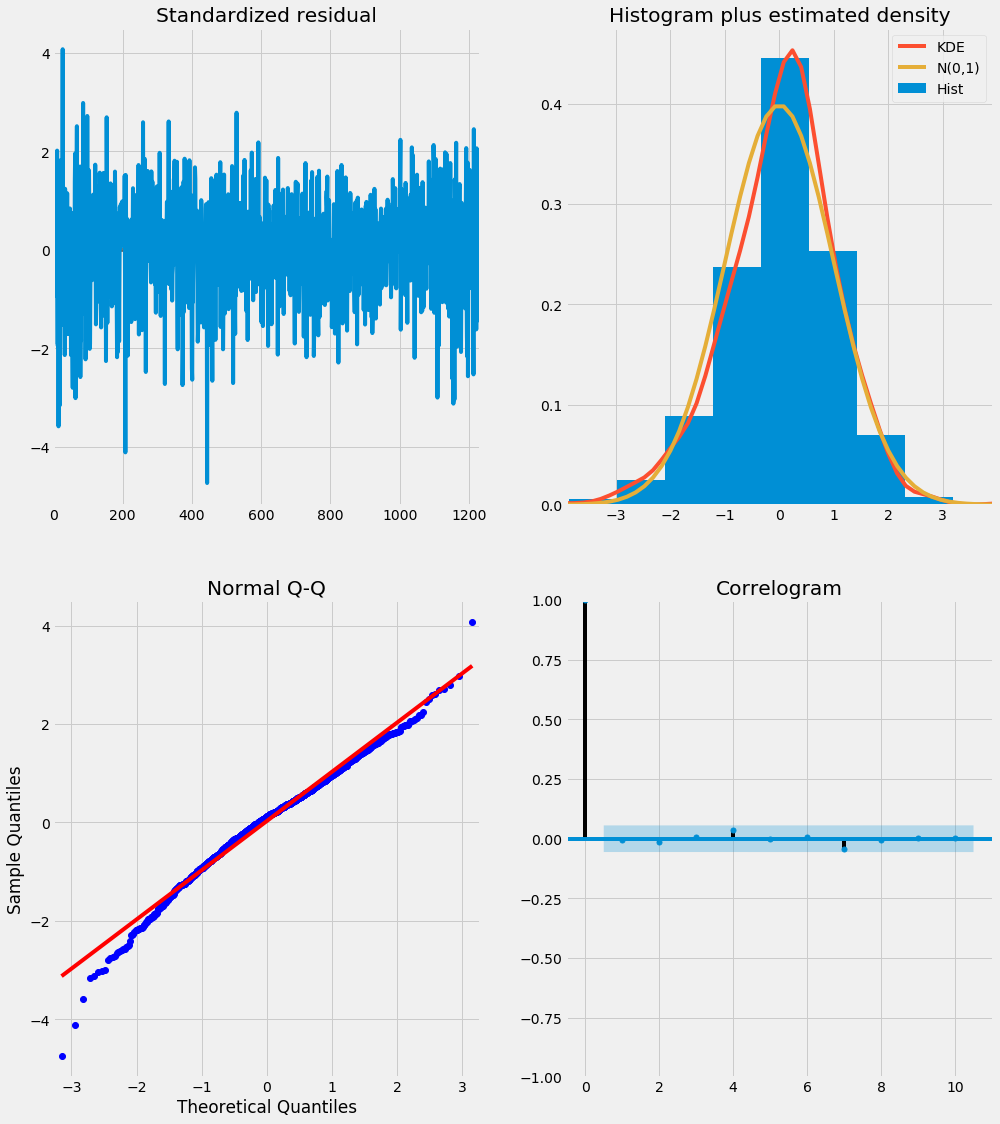

In [12]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('lqdoutput.png')
plt.show()

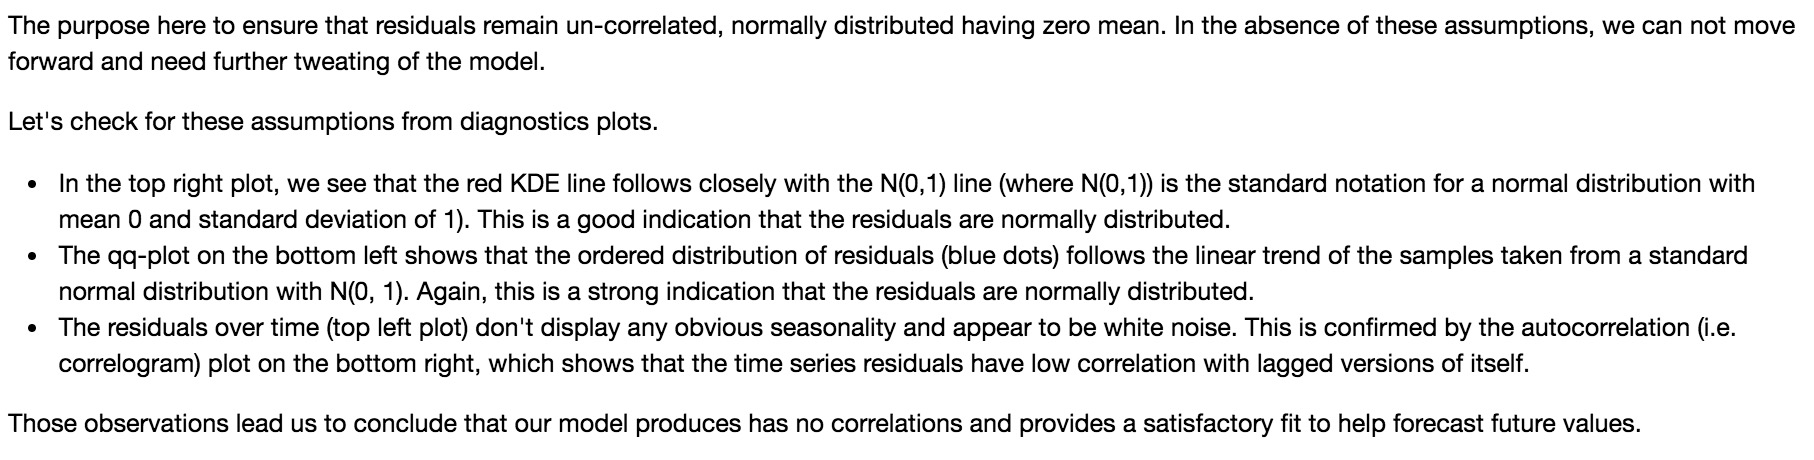

In [13]:
# plt.savefig('arima1.png')

In [14]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

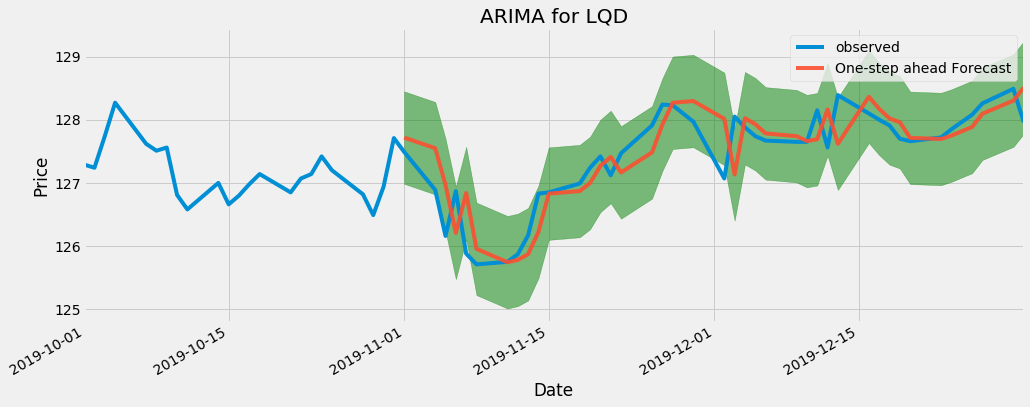

In [15]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019-10':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
plt.title('ARIMA for LQD')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('lqd_arima.png')
plt.show()

In [16]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.18


In [17]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

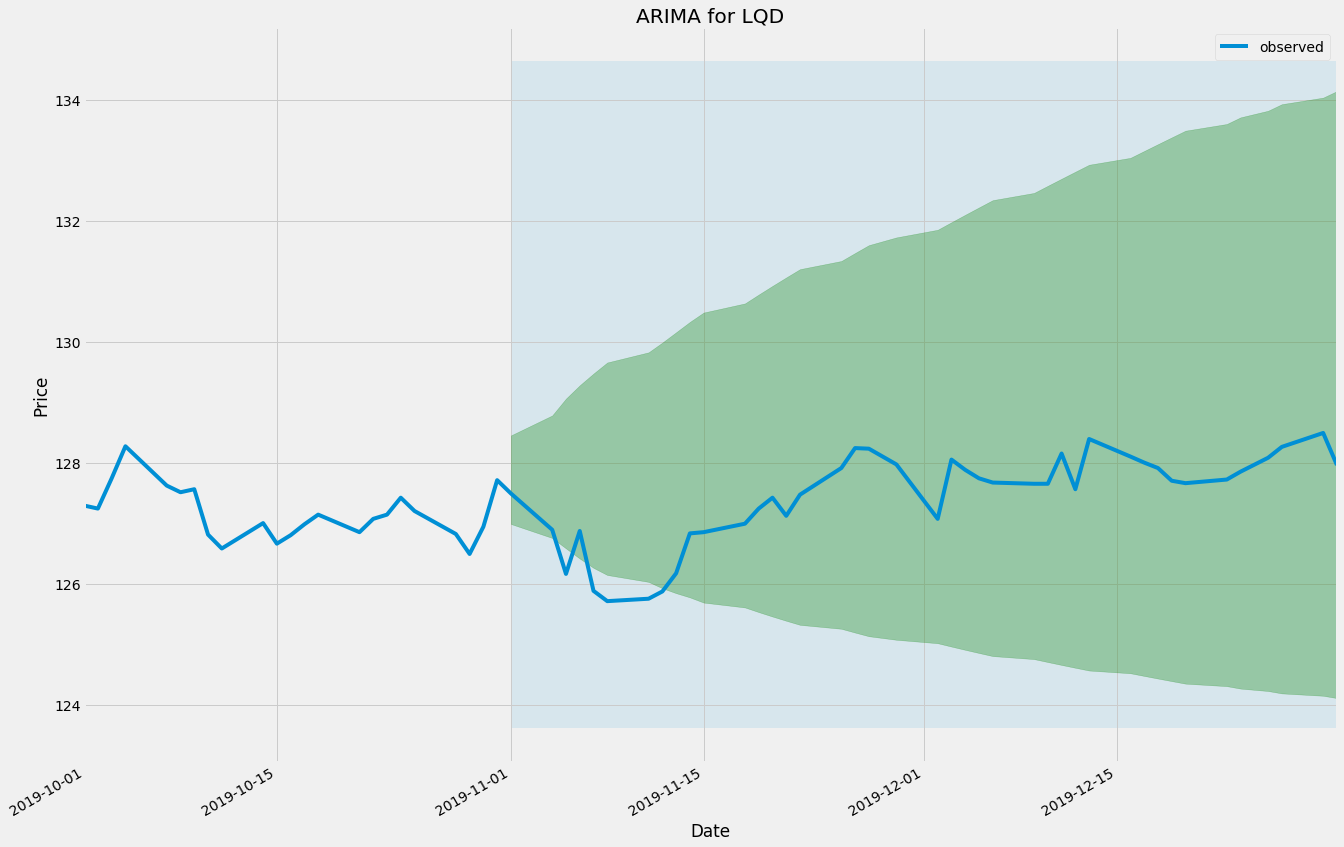

In [18]:
ax = ts['2019-10':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

plt.title('ARIMA for LQD')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('lqd_arima22.png')
plt.show()

In [19]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.27


In [20]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [21]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

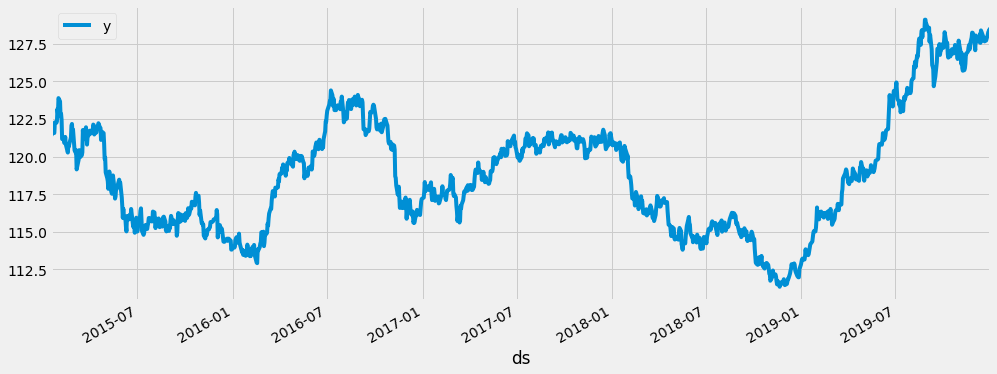

In [22]:
spy.set_index('ds').plot()

In [23]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [24]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [25]:
spy_df_novjan = df.tail(71)
spy_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [27]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [28]:
# pull_df

In [26]:
spy_yf = pd.read_csv('LQD_yf.csv')
spy_yf = spy_yf.rename(columns={"Date": "ds"})
spy_yf['ds'] = pd.to_datetime(spy_yf['ds'])

spy_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [27]:
spy_yf1 = spy_yf[['ds','Adj Close']]
spy_yf1

,ds,Adj Close
0,2019-11-01,126.811302
1,2019-11-04,126.214493
2,2019-11-05,125.488388
3,2019-11-06,126.194603
4,2019-11-07,125.209869
5,2019-11-08,125.040779
6,2019-11-11,125.080566
7,2019-11-12,125.199936
8,2019-11-13,125.498337
9,2019-11-14,126.154823


In [28]:
comb = spy_df_novjan.join(spy_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('lqd_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1249])
comb = comb.drop([1252])
comb = comb.drop([1253])
comb = comb.drop([1259])
comb = comb.drop([1260])
comb = comb.drop([1266])
comb = comb.drop([1267])
comb = comb.drop([1268])
comb = comb.drop([1273])
comb = comb.drop([1274])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1219,2019-11-18,126.735990,125.518760,127.880853,126.313965,-0.422025,-0.33%
1220,2019-11-19,126.775564,125.572564,128.052952,126.562630,-0.212934,-0.17%
1221,2019-11-20,126.842443,125.579842,128.024109,126.741676,-0.100767,-0.08%
1222,2019-11-21,126.872036,125.530485,128.092635,126.443275,-0.428761,-0.34%
1223,2019-11-22,126.946996,125.660900,128.118168,126.791412,-0.155584,-0.12%
1224,2019-11-25,127.010078,125.834668,128.369315,127.229073,0.218995,0.17%
1225,2019-11-26,127.080730,125.827180,128.284049,127.557320,0.476590,0.37%
1226,2019-11-27,127.174373,125.968086,128.390077,127.547356,0.372983,0.29%
1227,2019-11-29,127.318086,126.042330,128.615580,127.288750,-0.029336,-0.02%
1228,2019-12-02,127.401458,126.212980,128.702171,126.736206,-0.665252,-0.52%


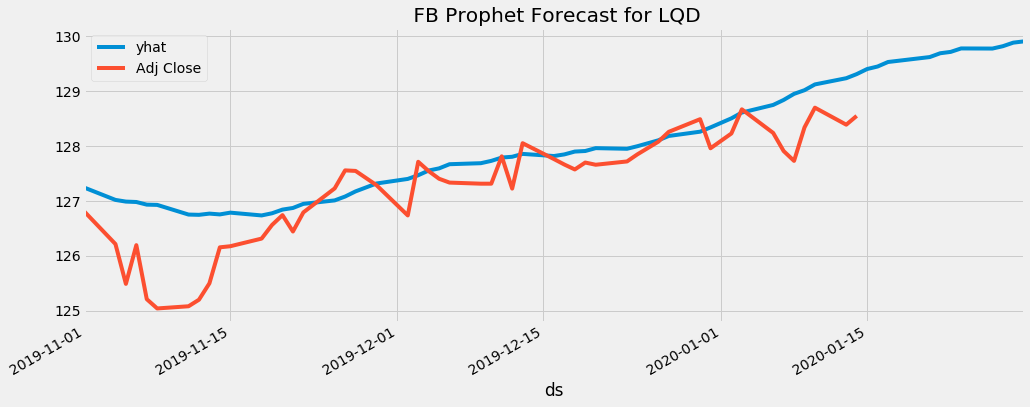

In [29]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.title(' FB Prophet Forecast for LQD')
plt.savefig('lqd_fbproph_forecast.png')

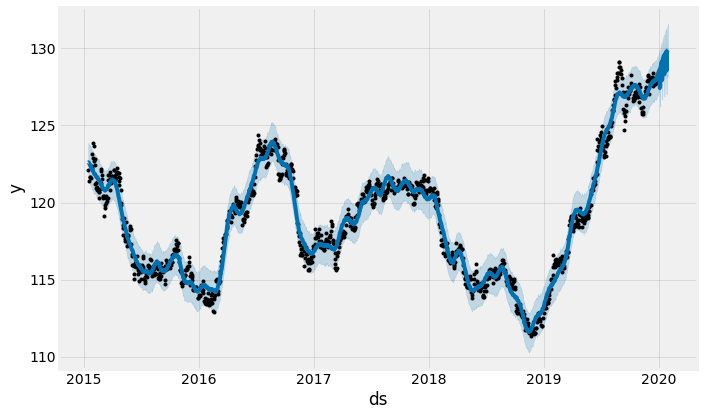

In [30]:
p.plot(df)
plt.savefig('lqd_fbp2.png')

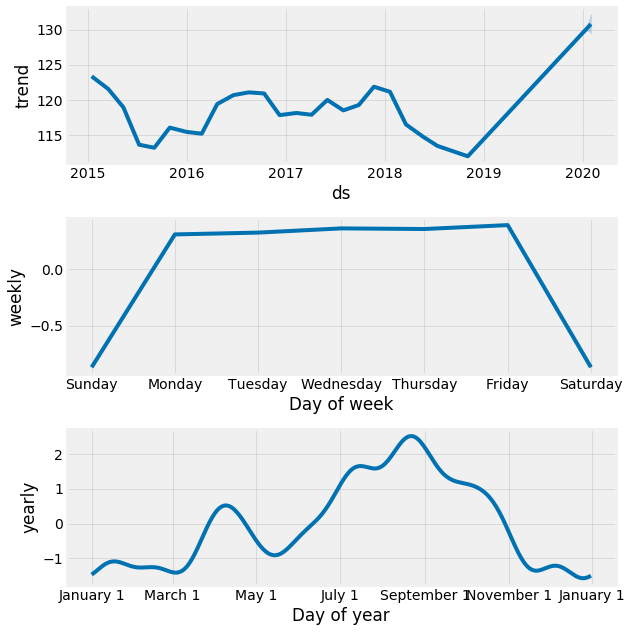

In [31]:
p.plot_components(out)
plt.savefig('lqd_seasonality.png')

In [44]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [45]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
pred = out[['ds', 'yhat']].set_index('ds')